In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv("yellow_tripdata_2019-06.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941024 entries, 0 to 6941023
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 953.2+ MB


In [4]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
missing_values_table(data)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 1. How does average trip duration in minutes change during the week?

In [6]:
data.tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)
data.tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)


In [7]:
data['duration_trip_sec']=(data.tpep_dropoff_datetime - data.tpep_pickup_datetime).dt.total_seconds().astype(int)

In [8]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,64
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5,21
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0,1173
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0,10
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,737


### Creating new column "week_number"

In [9]:
data['weekday'] = pd.DatetimeIndex(data['tpep_dropoff_datetime']).weekday
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-02 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 0
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-06-03 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-09 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 1
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-06-10 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-16 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 2
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-06-17 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-23 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 3
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-06-24 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 4
data = data.replace({pd.np.nan: None})
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0,1,N,145,145,2,...,0.5,0.5,0,0,0.3,4.3,0,64,5,0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0,1,N,262,263,2,...,3,0.5,0,0,0.3,6.3,2.5,21,5,0
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,...,0.5,0.5,0,0,0.3,18.8,0,1173,5,0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,...,1,0.5,0,0,0.3,4.3,0,10,5,0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,...,3,0.5,2.65,0,0.3,15.95,2.5,737,5,0


In [10]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
week_number,9599,0.1


### As you can see, I found some extra dates. So, there's my idea: 

    1. Drop all rows where year isn't equal to 2019
    2. All trips that starts 2019-05-31 or 2019-05-30 add to 0 week

In [11]:
data.loc[data.isnull().any(axis=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number
58,2,2019-05-31 23:59:59,2019-06-01 00:10:15,1,0.56,1,N,144,148,1,...,0.5,0.5,2.26,0,0.3,13.56,2.5,616,5,None
104,2,2019-05-31 23:59:34,2019-06-01 00:12:10,3,1.47,1,N,249,148,2,...,0.5,0.5,0,0,0.3,13.3,2.5,756,5,None
127,2,2019-05-31 23:59:10,2019-06-01 00:28:13,1,6.09,1,N,79,260,1,...,0.5,0.5,5.56,0,0.3,33.36,2.5,1743,5,None
210,2,2019-05-31 23:53:58,2019-06-01 00:03:18,1,2.9,1,N,238,116,1,...,0.5,0.5,2.46,0,0.3,14.76,0,560,5,None
221,2,2019-05-31 23:58:11,2019-06-01 00:40:48,1,11.19,1,N,132,61,1,...,0.5,0.5,7.86,0,0.3,47.16,0,2557,5,None
260,2,2019-05-31 23:53:37,2019-06-01 00:02:48,1,0.99,1,N,4,148,1,...,0.5,0.5,1,0,0.3,12.3,2.5,551,5,None
311,2,2019-05-31 23:56:14,2019-05-31 23:59:11,1,0.61,1,N,113,90,2,...,0.5,0.5,0,0,0.3,7.8,2.5,177,4,None
456,2,2019-05-31 23:53:33,2019-06-01 00:05:31,1,2.8,1,N,142,75,2,...,0.5,0.5,0,0,0.3,15.3,2.5,718,5,None
521,2,2019-05-31 23:58:58,2019-06-01 00:16:20,1,2.93,1,N,158,163,2,...,0.5,0.5,0,0,0.3,17.3,2.5,1042,5,None
657,2,2019-05-31 23:56:13,2019-06-01 00:03:38,1,1.73,1,N,87,114,1,...,0.5,0.5,1,0,0.3,12.3,2.5,445,5,None


In [12]:
data.loc[(data['tpep_pickup_datetime'] >= datetime.strptime('2019-05-30 00:00:00', '%Y-%m-%d %H:%M:%S')) 
                           & (data['tpep_dropoff_datetime'] <= datetime.strptime('2019-06-02 23:59:59', '%Y-%m-%d %H:%M:%S')), 'week_number'] = 0


In [13]:
data['year'] = pd.DatetimeIndex(data['tpep_dropoff_datetime']).year
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,year
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0,1,N,145,145,2,...,0.5,0,0,0.3,4.3,0,64,5,0,2019
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0,1,N,262,263,2,...,0.5,0,0,0.3,6.3,2.5,21,5,0,2019
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,...,0.5,0,0,0.3,18.8,0,1173,5,0,2019
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,...,0.5,0,0,0.3,4.3,0,10,5,0,2019
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,...,0.5,2.65,0,0.3,15.95,2.5,737,5,0,2019


In [14]:
data = data.loc[data.year == 2019] # remove 51 rows where year isn't 2019
data.shape

(6940973, 22)

### There's no more trips without week number

In [15]:
data.loc[data.isnull().any(axis=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,year
246037,2,2019-06-02 00:35:43,2019-06-03 00:16:57,1,1.02,1,N,48,68,1,...,0.5,1.76,0,0.3,10.56,2.5,85274,0,None,2019
246937,2,2019-06-02 00:38:56,2019-06-03 00:36:30,1,1.39,1,N,260,82,2,...,0.5,0,0,0.3,8.3,0,86254,0,None,2019
247771,2,2019-06-02 23:27:53,2019-06-03 00:44:36,1,0,5,N,161,107,1,...,0,10,0,0,132.5,2.5,4603,0,None,2019
248657,2,2019-06-02 00:26:50,2019-06-03 00:00:00,1,2.59,1,N,141,79,1,...,0.5,0,0,0.3,13.8,2.5,84790,0,None,2019
249183,2,2019-06-02 00:32:01,2019-06-03 00:08:30,1,2.07,1,N,234,148,1,...,0.5,2.22,0,0.3,17.02,2.5,84989,0,None,2019
249237,2,2019-06-02 00:26:34,2019-06-03 00:25:13,5,6.56,1,N,234,223,1,...,0.5,3.94,0,0.3,30.24,2.5,86319,0,None,2019
250200,2,2019-06-02 00:53:24,2019-06-03 00:51:23,1,1.28,1,N,211,79,1,...,0.5,0,0,0.3,11.8,2.5,86279,0,None,2019
251858,2,2019-06-02 00:28:27,2019-06-03 00:15:46,1,2.33,1,N,164,79,1,...,0.5,1.48,0,0.3,16.28,2.5,85639,0,None,2019
252960,2,2019-06-02 00:54:06,2019-06-03 00:52:18,1,4.82,1,N,249,181,1,...,0.5,4.32,0,0.3,33.12,2.5,86292,0,None,2019
253578,2,2019-06-02 00:19:39,2019-06-03 00:12:38,5,1.17,1,N,90,246,1,...,0.5,0,0,0.3,10.3,2.5,85979,0,None,2019


In [16]:
data.groupby('week_number')['duration_trip_sec'].mean() / 60

week_number
0.0    16.077112
1.0    17.843766
2.0    18.101654
3.0    18.675448
4.0    18.634931
Name: duration_trip_sec, dtype: float64

In [17]:
[0, 0, 0] + list(data.loc[data.week_number == 0].groupby(['weekday'])['duration_trip_sec'].mean().values / 60)

[0,
 0,
 0,
 -359.63666666666666,
 10.263695090439278,
 13.652965909530842,
 18.859269923454004]

## So, it's interesting. In data we have trips where duration < 0. I think we should drop them

In [18]:
data.loc[data.duration_trip_sec < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,year
275617,1,2019-06-02 03:03:08,2019-05-30 13:53:34,1,1.9,1,N,234,230,2,...,0.5,0,0,0.3,17.8,2.5,-220174,3,0,2019
4339125,1,2019-06-19 17:51:49,2019-06-18 18:42:02,1,1.6,1,N,143,230,1,...,0.5,3.75,0,0.3,22.55,2.5,-83387,1,3,2019
6186200,1,2019-06-27 15:15:30,2019-06-24 15:56:07,1,1.5,1,Y,163,233,1,...,0.5,1.6,0,0.3,13.4,2.5,-256763,0,4,2019


In [19]:
data = data.loc[data.duration_trip_sec > 0]

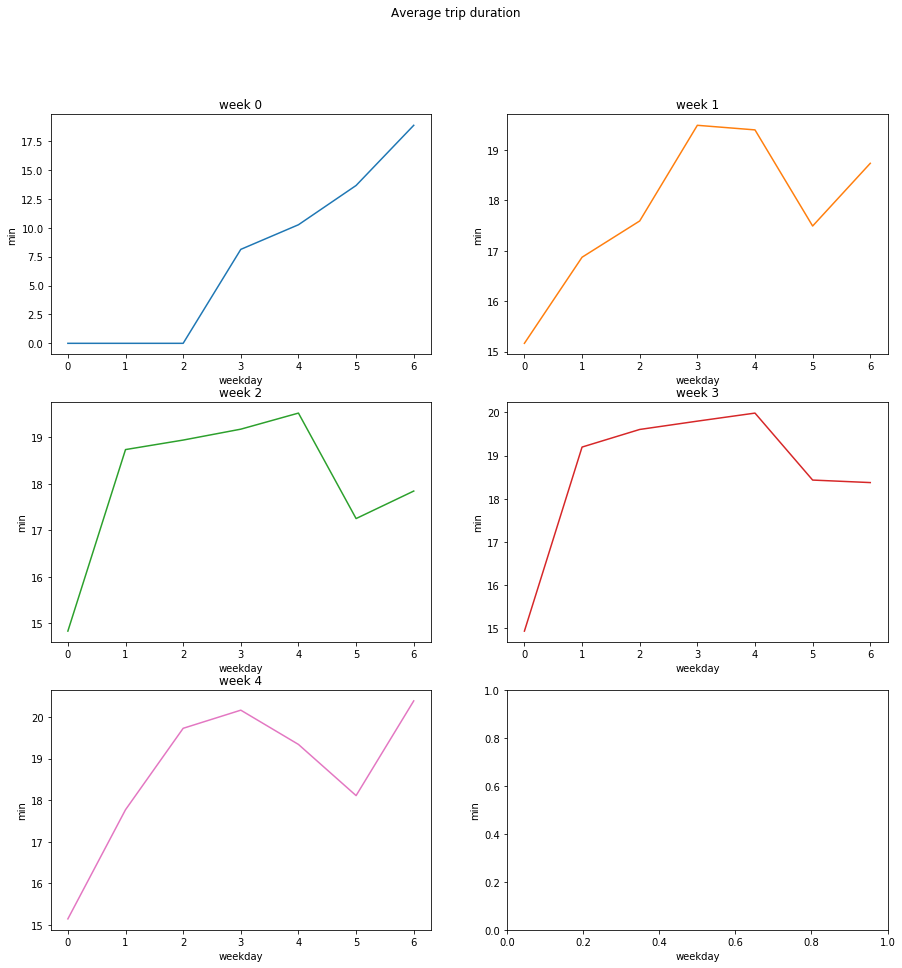

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Average trip duration')
x = [i for i in range(0, 7)]
#  help3.groupby(['hour'])['VendorID'].count().values
axs[0, 0].plot(x, [0, 0, 0] + list(data.loc[data.week_number == 0].groupby(['weekday'])['duration_trip_sec'].mean().values / 60))
axs[0, 0].set_title('week 0')
axs[0, 1].plot(x, data.loc[data.week_number == 1].groupby(['weekday'])['duration_trip_sec'].mean().values / 60, 'tab:orange')
axs[0, 1].set_title('week 1')
axs[1, 0].plot(x, data.loc[data.week_number == 2].groupby(['weekday'])['duration_trip_sec'].mean().values / 60, 'tab:green')
axs[1, 0].set_title('week 2')
axs[1, 1].plot(x, data.loc[data.week_number == 3].groupby(['weekday'])['duration_trip_sec'].mean().values / 60, 'tab:red')
axs[1, 1].set_title('week 3')
axs[2, 0].plot(x, data.loc[data.week_number == 4].groupby(['weekday'])['duration_trip_sec'].mean().values / 60, 'tab:pink')
axs[2, 0].set_title('week 4')

for ax in axs.flat:
    ax.set(xlabel='weekday', ylabel='min')

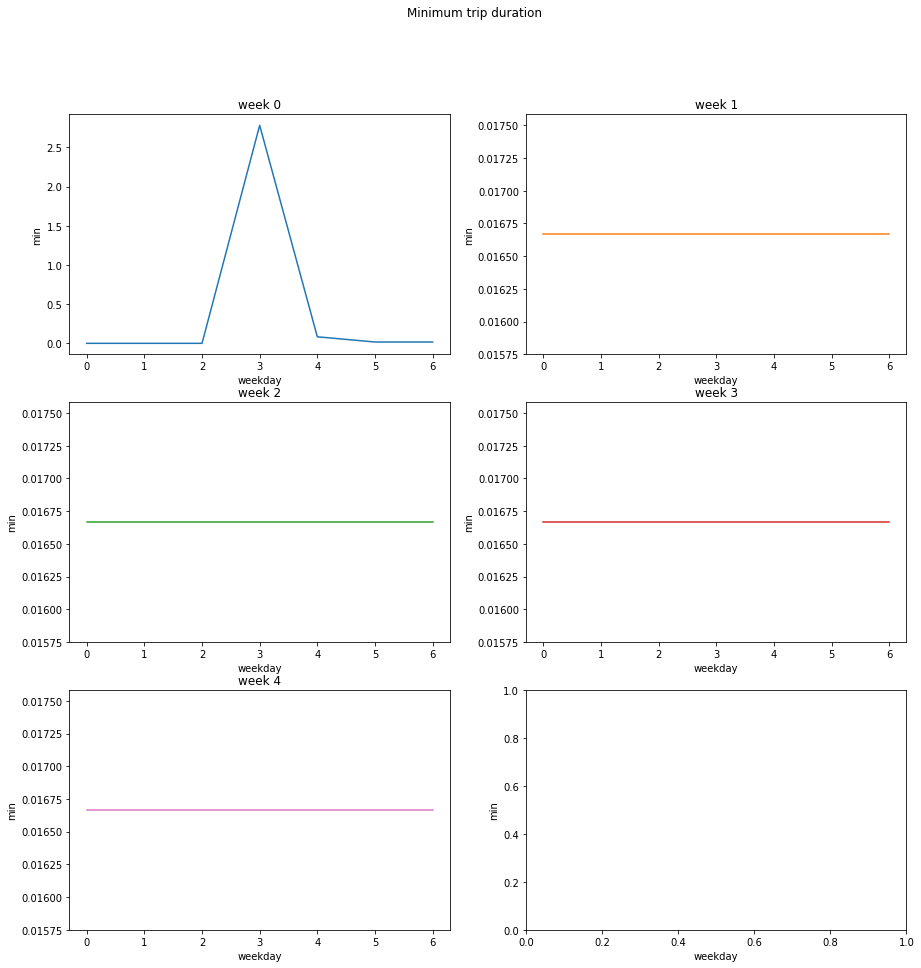

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Minimum trip duration')
x = [i for i in range(0, 7)]
#  help3.groupby(['hour'])['VendorID'].count().values
axs[0, 0].plot(x, [0, 0, 0] + list(data.loc[data.week_number == 0].groupby(['weekday'])['duration_trip_sec'].min().values / 60))
axs[0, 0].set_title('week 0')
axs[0, 1].plot(x, data.loc[data.week_number == 1].groupby(['weekday'])['duration_trip_sec'].min().values / 60, 'tab:orange')
axs[0, 1].set_title('week 1')
axs[1, 0].plot(x, data.loc[data.week_number == 2].groupby(['weekday'])['duration_trip_sec'].min().values / 60, 'tab:green')
axs[1, 0].set_title('week 2')
axs[1, 1].plot(x, data.loc[data.week_number == 3].groupby(['weekday'])['duration_trip_sec'].min().values / 60, 'tab:red')
axs[1, 1].set_title('week 3')
axs[2, 0].plot(x, data.loc[data.week_number == 4].groupby(['weekday'])['duration_trip_sec'].min().values / 60, 'tab:pink')
axs[2, 0].set_title('week 4')

for ax in axs.flat:
    ax.set(xlabel='weekday', ylabel='min')

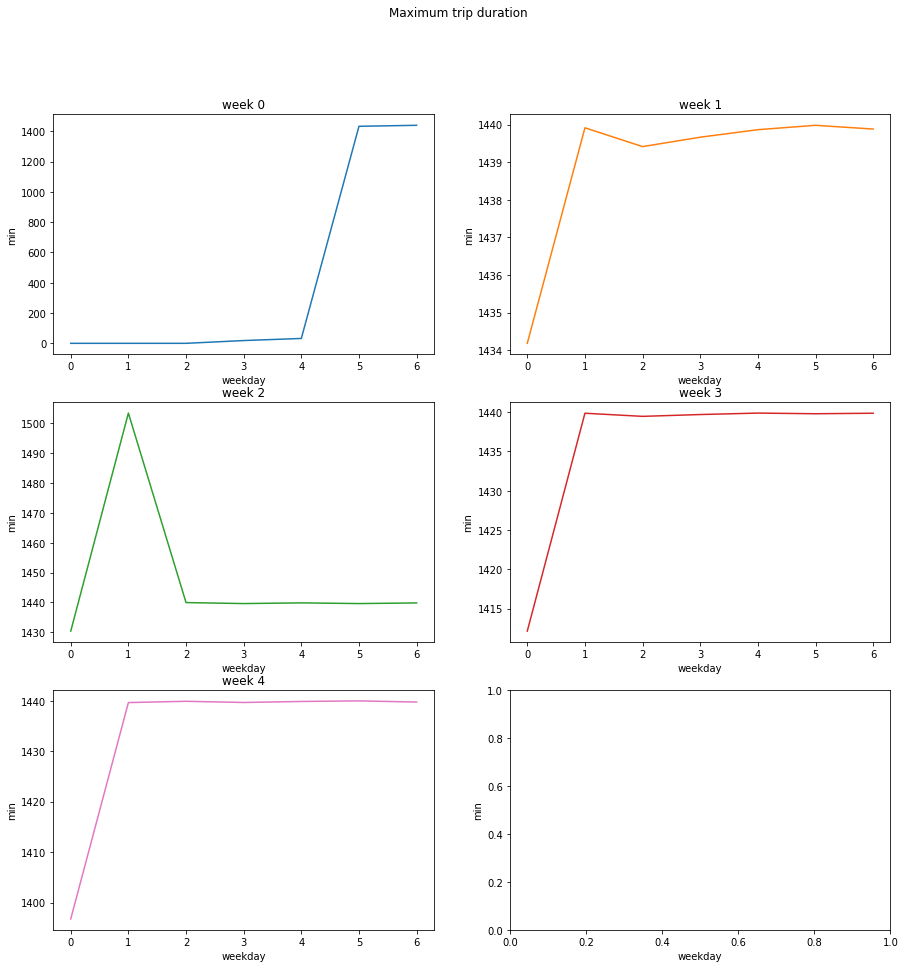

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Maximum trip duration')
x = [i for i in range(0, 7)]
#  help3.groupby(['hour'])['VendorID'].count().values
axs[0, 0].plot(x, [0, 0, 0] + list(data.loc[data.week_number == 0].groupby(['weekday'])['duration_trip_sec'].max().values / 60))
axs[0, 0].set_title('week 0')
axs[0, 1].plot(x, data.loc[data.week_number == 1].groupby(['weekday'])['duration_trip_sec'].max().values / 60, 'tab:orange')
axs[0, 1].set_title('week 1')
axs[1, 0].plot(x, data.loc[data.week_number == 2].groupby(['weekday'])['duration_trip_sec'].max().values / 60, 'tab:green')
axs[1, 0].set_title('week 2')
axs[1, 1].plot(x, data.loc[data.week_number == 3].groupby(['weekday'])['duration_trip_sec'].max().values / 60, 'tab:red')
axs[1, 1].set_title('week 3')
axs[2, 0].plot(x, data.loc[data.week_number == 4].groupby(['weekday'])['duration_trip_sec'].max().values / 60, 'tab:pink')
axs[2, 0].set_title('week 4')

for ax in axs.flat:
    ax.set(xlabel='weekday', ylabel='min')

In [23]:
data = data.drop(['year'], axis=1) # I don't need year anymore

## 2. Take only the trips between different boroughs. Which pair of different boroughs results in the highest average trip fare?

In [24]:
locs = pd.read_csv('taxi+_zone_lookup.csv')
locs.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [25]:
locs.loc[(locs.LocationID == 262) | (locs.LocationID == 263)] # it was really funny to find this values

,LocationID,Borough,Zone,service_zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone


In [26]:
data = pd.merge(data, locs[['LocationID', 'Borough']], how='left', left_on='PULocationID', right_on='LocationID')
data = data.drop(['LocationID'], axis=1)
data = data.rename(columns={"Borough": "PUBorough"}) 
data = pd.merge(data, locs[['LocationID', 'Borough']], how='left', left_on='DOLocationID', right_on='LocationID')
data = data.drop(['LocationID'], axis=1)
data = data.rename(columns={"Borough": "DOBorough"}) 
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,PUBorough,DOBorough
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0,1,N,145,145,2,...,0,0,0.3,4.3,0,64,5,0,Queens,Queens
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0,1,N,262,263,2,...,0,0,0.3,6.3,2.5,21,5,0,Manhattan,Manhattan
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,...,0,0,0.3,18.8,0,1173,5,0,Manhattan,Queens
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,...,0,0,0.3,4.3,0,10,5,0,Queens,Queens
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,...,2.65,0,0.3,15.95,2.5,737,5,0,Manhattan,Manhattan


### I can't tell anything about LocationID 264 and 265, I suppose I don't need to look at them

In [27]:
locs.loc[locs.Borough == 'Unknown']

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [28]:
data["total_amount"] = pd.to_numeric(data["total_amount"]) # after some operation column total_amount changed type, so I changed it back

data.loc[(data.PUBorough != data.DOBorough) & ((data.PUBorough != 'Unknown') & (data.DOBorough != 'Unknown'))].groupby(['PUBorough', 'DOBorough'])["total_amount"].mean()

PUBorough      DOBorough    
Bronx          Brooklyn          61.182106
               EWR              102.300000
               Manhattan         27.511866
               Queens            49.412829
               Staten Island     88.240000
Brooklyn       Bronx             57.235283
               EWR              103.646548
               Manhattan         29.039458
               Queens            35.431226
               Staten Island     63.838358
EWR            Manhattan         64.131818
               Queens           145.410000
Manhattan      Bronx             33.304708
               Brooklyn          31.765183
               EWR               98.074335
               Queens            47.419301
               Staten Island     82.575518
Queens         Bronx             56.178329
               Brooklyn          48.047756
               EWR              150.873504
               Manhattan         57.089008
               Staten Island     95.236585
Staten Island  Bronx     

## So, the highest average trip fare is between Queens and EWR and it equals 151.020371

I hope that trip fare is total amount, not total amount with tips (it's easy to calculate, sum of columns total_amount and tip_amount) or total amount without tolls (total_amount-tolls_amount)

In [29]:
data.loc[(data.PUBorough != data.DOBorough)].groupby(['PUBorough', 'DOBorough'])["total_amount"].mean()
# I just checked that if "Unknown" in Boroughs, the answer is the same

PUBorough      DOBorough    
Bronx          Brooklyn          61.182106
               EWR              102.300000
               Manhattan         27.511866
               Queens            49.412829
               Staten Island     88.240000
               Unknown           35.439474
Brooklyn       Bronx             57.235283
               EWR              103.646548
               Manhattan         29.039458
               Queens            35.431226
               Staten Island     63.838358
               Unknown           39.556996
EWR            Manhattan         64.131818
               Queens           145.410000
               Unknown           99.209167
Manhattan      Bronx             33.304708
               Brooklyn          31.765183
               EWR               98.074335
               Queens            47.419301
               Staten Island     82.575518
               Unknown           57.011529
Queens         Bronx             56.178329
               Brooklyn  

## 3. Drivers are unsatisfied with fares from Manhattan during evening peak hours on working days. Management team wants to introduce subsidies ($X$ per ride) in such hours. Identify which hours are most likely the problem ones and estimate possible value of X considering monthly budget of $6$mln.

In [30]:
data['hour'] = pd.DatetimeIndex(data['tpep_pickup_datetime']).hour
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,PUBorough,DOBorough,hour
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0,1,N,145,145,2,...,0,0.3,4.30,0,64,5,0,Queens,Queens,0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0,1,N,262,263,2,...,0,0.3,6.30,2.5,21,5,0,Manhattan,Manhattan,0
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,...,0,0.3,18.80,0,1173,5,0,Manhattan,Queens,0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,...,0,0.3,4.30,0,10,5,0,Queens,Queens,0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,...,0,0.3,15.95,2.5,737,5,0,Manhattan,Manhattan,0


In [31]:
help3 = data.loc[(data.PUBorough == 'Manhattan') & (data['weekday'] >= 0) & (data['weekday'] < 5)]
help3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_trip_sec,weekday,week_number,PUBorough,DOBorough,hour
311,2,2019-05-31 23:56:14,2019-05-31 23:59:11,1,0.61,1,N,113,90,2,...,0,0.3,7.80,2.5,177,4,0,Manhattan,Manhattan,23
1419,2,2019-05-31 22:28:05,2019-05-31 22:49:14,1,6.77,1,N,142,244,2,...,0,0.3,27.30,2.5,1269,4,0,Manhattan,Manhattan,22
1806,2,2019-05-31 23:26:20,2019-05-31 23:38:39,1,1.93,1,N,230,141,2,...,0,0.3,13.80,2.5,739,4,0,Manhattan,Manhattan,23
1807,2,2019-05-31 23:47:10,2019-05-31 23:52:31,1,0.76,1,N,107,90,1,...,0,0.3,11.16,2.5,321,4,0,Manhattan,Manhattan,23
2149,2,2019-05-31 23:25:24,2019-05-31 23:38:54,5,0.77,1,N,170,170,2,...,0,0.3,12.80,2.5,810,4,0,Manhattan,Manhattan,23


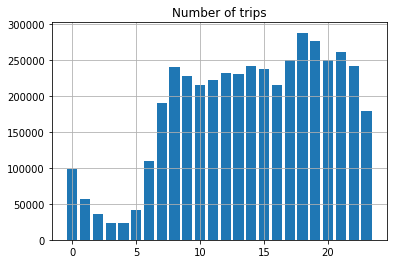

<Figure size 2880x2160 with 0 Axes>

In [32]:
# bar()
fig = plt.figure()
x = [i for i in range(0, 24)]
y = help3.groupby(['hour'])['VendorID'].count().values
plt.bar(x, y)
plt.title('Number of trips')
plt.grid(True)
plt.figure(figsize=(40,30))
plt.show()

## It's look like between 17 and 20 hour is peak time

In [33]:
help3.loc[(16 <= help3.hour) &(help3.hour <= 21)].groupby(['hour', 'week_number'])['VendorID'].count()

hour  week_number
16    0.0                1
      1.0            56079
      2.0            53032
      3.0            53529
      4.0            52501
17    1.0            64872
      2.0            62030
      3.0            61505
      4.0            61736
18    1.0            73709
      2.0            71638
      3.0            70733
      4.0            71668
19    1.0            70882
      2.0            68387
      3.0            68580
      4.0            68919
20    0.0                9
      1.0            62936
      2.0            62079
      3.0            62132
      4.0            63111
21    0.0               19
      1.0            64554
      2.0            67515
      3.0            63253
      4.0            65350
Name: VendorID, dtype: int64

## So, there's 18 and 19 is peak hours

In [34]:
count_peak_18 = help3.loc[(18 == help3.hour) & (help3.week_number != 0) ].groupby(['hour', 'week_number'])['VendorID'].count().median()
count_peak_19 = help3.loc[(help3.hour == 19) & (help3.week_number != 0) ].groupby(['hour', 'week_number'])['VendorID'].count().median()

# median of trip's number in peak hours

estim = 6000000 / (30 * (count_peak_18 + count_peak_19))
print(estim)

1.4244760598992183


I'm offering a subsidy of 1.4$ per trip

In [35]:
del help3 